In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [9]:
max_length0 = '100mlength'
fold = '*'
path = 'C:/Users/minsu/Desktop/Work/current/mlpractical/semester2/TwitterSA/code/reports/*fold{}.csv'.format(fold)

In [10]:
def read_reports(path, kernels, max_length):
    dfs = []
    layer_sizes = []
    accuracy_values = []
    all_files = glob.glob(path)
    for filename in all_files:
        if kernels in filename and max_length in filename:
            dfs.append(pd.read_csv(filename))
            layer_substring_location = filename.find('cnn')
            layer_number = filename[layer_substring_location - 2:layer_substring_location]
            if not layer_number.isnumeric:
                layer_number = layer_number[1:len(kernel_number)]
            lsize = int(layer_number)
            layer_sizes.append(lsize)
    for k in range(len(layer_sizes)):
        if layer_sizes[k] < 0:
            layer_sizes[k] = -layer_sizes[k]
        accuracy_values.append(dfs[k].loc[3][1])
    sorted_data = sorted(zip(layer_sizes, accuracy_values), key=lambda x: x[0])
    layer_sizes, accuracy_values = zip(*sorted_data)
    print(layer_sizes, accuracy_values)
    return layer_sizes, accuracy_values

In [11]:
def cal_average(layer_sizes, accuracy_values):
    identical = 1
    new_layer_sizes = [layer_sizes[0]]
    new_accuracy_values = [accuracy_values[0]]
    current_layer = layer_sizes[0]
    current_idx = 0
    current_layer_count = 1
    for i in range(1, len(layer_sizes)):
        next_layer = layer_sizes[i]
        if next_layer != current_layer:
            identical = max(identical, current_layer_count)
            current_layer = next_layer
            current_layer_count = 1
            current_idx += 1
            new_layer_sizes.append(next_layer)
            new_accuracy_values.append(accuracy_values[i])
        else:
            past_acc_sum = new_accuracy_values[current_idx] * current_layer_count
            current_layer_count += 1
            new_accuracy_values[current_idx] = (past_acc_sum + accuracy_values[i]) / current_layer_count
    print(len(new_layer_sizes), len(new_accuracy_values))
    print(new_layer_sizes, new_accuracy_values)
    print(identical)
    return new_layer_sizes, new_accuracy_values

In [12]:
kernel0 = '-3kernel'

layer_sizes0, accuracy_values0 = read_reports(path, kernel0, max_length0)
layer_sizes0, accuracy_values0 = cal_average(layer_sizes0, accuracy_values0)

(2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10) (0.9672897196261684, 0.9681023973994312, 0.9697277529459568, 0.9678992279561154, 0.9628199918732224, 0.9646485168630636, 0.9744006501422188, 0.970337261275904, 0.9731816334823242, 0.9705404307192198, 0.9727752945956928, 0.9752133279154817, 0.9705404307192198, 0.9788703778951644, 0.9715562779357984, 0.97338480292564, 0.979276716781796, 0.9811052417716376, 0.9739943112555872, 0.9794798862251116, 0.97338480292564, 0.97338480292564, 0.9729784640390086, 0.9721657862657456, 0.97196261682243, 0.9691182446160096, 0.9772450223486387, 0.9741974806989028, 0.9766355140186916, 0.9544900446972776, 0.9640390085331166, 0.9705404307192198, 0.9737911418122714, 0.97480698902885, 0.9634295002031694, 0.9650548557496952, 0.9768386834620072, 0.97196261682243, 0.9548963835839088, 0.9741974806989028, 0.970337261275904, 0.9693214140593256, 0.9735879723689556, 0.96911824461

In [13]:
kernel1 = '-4kernel'

layer_sizes1, accuracy_values1 = read_reports(path, kernel1, max_length0)
layer_sizes1, accuracy_values1 = cal_average(layer_sizes1, accuracy_values1)

(2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10) (0.9579439252336448, 0.9650548557496952, 0.9676960585127996, 0.9597724502234865, 0.9715562779357984, 0.967492889069484, 0.9668833807395368, 0.9731816334823242, 0.9707436001625356, 0.9758228362454286, 0.9721657862657456, 0.9741974806989028, 0.9695245835026411, 0.97480698902885, 0.9638358390898007, 0.9709467696058512, 0.9758228362454286, 0.97338480292564, 0.9662738724095896, 0.9701340918325884, 0.9737911418122714, 0.958553433563592, 0.9707436001625356, 0.9654611946363268, 0.97196261682243, 0.9715562779357984, 0.9721657862657456, 0.9660707029662738, 0.961600975213328, 0.9707436001625356, 0.9676960585127996, 0.9715562779357984, 0.968915075172694)
9 9
[2, 3, 4, 5, 6, 7, 8, 9, 10] [0.9644047135310849, 0.9708248679398619, 0.970906135717188, 0.97338480292564, 0.9700663686848165, 0.9649194094541516, 0.971894893674658, 0.9661384261140459, 0.9693891372070974]
5


In [16]:
kernel2 = '-5kernel'

layer_sizes2, accuracy_values2 = read_reports(path, kernel2, max_length0)
layer_sizes2, accuracy_values2 = cal_average(layer_sizes2, accuracy_values2)

(2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10) (0.9628199918732224, 0.9683055668427468, 0.9638358390898007, 0.967492889069484, 0.9550995530272248, 0.967492889069484, 0.97338480292564, 0.968915075172694, 0.970337261275904, 0.9723689557090612, 0.9658675335229582, 0.9754164973587972, 0.9750101584721658, 0.9723689557090612, 0.9754164973587972, 0.9729784640390086, 0.9774481917919544, 0.9758228362454286, 0.9672897196261684, 0.9695245835026411, 0.9707436001625356, 0.9735879723689556, 0.9691182446160096, 0.9709467696058512, 0.9735879723689556, 0.9555058919138562, 0.97622917513206, 0.9676960585127996, 0.9713531084924828, 0.967492889069484, 0.9721657862657456, 0.9752133279154817, 0.9699309223892728, 0.971149939049167, 0.9569280780170664, 0.9678992279561154, 0.9676960585127996, 0.9577407557903292, 0.94819179195449, 0.9650548557496952, 0.960178789110118, 0.9678992279561154, 0.9559122308004876, 0.961397805

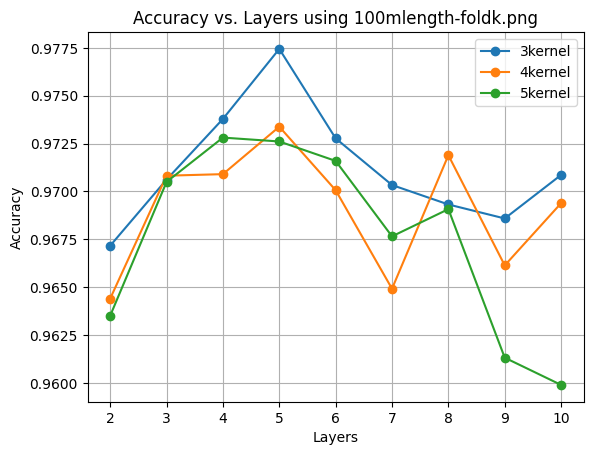

In [17]:
plt.plot(layer_sizes0, accuracy_values0, '-o', label=kernel0[1:])
plt.plot(layer_sizes1, accuracy_values1, '-o', label=kernel1[1:])
plt.plot(layer_sizes2, accuracy_values2, '-o', label=kernel2[1:])
plt.xticks([i for i in range(2, layer_sizes0[len(layer_sizes0)-1]+1, 2 if layer_sizes0[len(layer_sizes0)-1]>=20 else 1)])
plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Layers using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.grid(True)
plt.legend()
plt.savefig('./reports/figures/Accuracy vs. Layers using {0}-fold{1}.png'.format(max_length0, fold if fold != '*' else 'k'))
plt.show()